In [1]:
!pip install pyarrow


Defaulting to user installation because normal site-packages is not writeable


## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd "C:\Users\SSD\Desktop\pga 26\green taxi"

C:\Users\SSD\Desktop\pga 26\green taxi


In [4]:
greentaxi=pd.read_parquet("green_tripdata_2022-11.parquet")

# Data Preprocessing

In [5]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62313 entries, 0 to 62312
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62313 non-null  int64         
 1   lpep_pickup_datetime   62313 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62313 non-null  datetime64[ns]
 3   store_and_fwd_flag     56192 non-null  object        
 4   RatecodeID             56192 non-null  float64       
 5   PULocationID           62313 non-null  int64         
 6   DOLocationID           62313 non-null  int64         
 7   passenger_count        56192 non-null  float64       
 8   trip_distance          62313 non-null  float64       
 9   fare_amount            62313 non-null  float64       
 10  extra                  62313 non-null  float64       
 11  mta_tax                62313 non-null  float64       
 12  tip_amount             62313 non-null  float64       
 13  t

In [6]:
greentaxi=greentaxi.drop(["ehail_fee"],axis=1)
# Dropping "ehail_fee" due to the null column 

In [7]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62313 entries, 0 to 62312
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62313 non-null  int64         
 1   lpep_pickup_datetime   62313 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62313 non-null  datetime64[ns]
 3   store_and_fwd_flag     56192 non-null  object        
 4   RatecodeID             56192 non-null  float64       
 5   PULocationID           62313 non-null  int64         
 6   DOLocationID           62313 non-null  int64         
 7   passenger_count        56192 non-null  float64       
 8   trip_distance          62313 non-null  float64       
 9   fare_amount            62313 non-null  float64       
 10  extra                  62313 non-null  float64       
 11  mta_tax                62313 non-null  float64       
 12  tip_amount             62313 non-null  float64       
 13  t

In [8]:
greentaxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [9]:
# Split data into numeric and categorical variables
numcols=greentaxi[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge']]

In [10]:
objcols=greentaxi[[ 'store_and_fwd_flag', 'RatecodeID','payment_type', 'trip_type' ]]

In [11]:
numcols.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,56192.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,56192.000000
mean,1.307179,83.301308,14.990903,0.339127,0.422921,2.014565,0.218133,0.297574,18.976286,0.763583
std,0.960456,3374.500924,18.093849,0.620629,0.183723,2.766108,1.285773,0.034413,19.341514,1.231793
min,0.000000,0.000000,-100.000000,-4.500000,-0.500000,-1.160000,0.000000,-0.300000,-100.300000,-2.750000
25%,1.000000,1.180000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,0.000000
50%,1.000000,2.010000,11.000000,0.000000,0.500000,1.560000,0.000000,0.300000,14.760000,0.000000
75%,1.000000,3.650000,17.500000,0.500000,0.500000,3.000000,0.000000,0.300000,22.110000,2.750000
max,9.000000,241021.090000,2020.200000,4.500000,0.500000,110.880000,73.750000,0.300000,2021.000000,2.750000


In [12]:
# Finding null values for numerical variables
numcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

passenger_count          0.09823
congestion_surcharge     0.09823
trip_distance            0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
dtype: float64

In [13]:
# Median Imputaion for both variable passenger_count and congestion_surcharge
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\469277080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols[col]=numcols[col].fillna(numcols[col].median())


In [14]:
# Finding null values for categorical variables.
objcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

store_and_fwd_flag    0.09823
RatecodeID            0.09823
payment_type          0.09823
trip_type             0.09823
dtype: float64

In [15]:
# Null values imputation of objcols.
for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\3362842512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\3362842512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\3362842512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [16]:
# Combine smaller level or categorical into common level/category
objcols.RatecodeID=objcols.RatecodeID.replace([2.0,3.0,4.0,6.0],2346)

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\1053332944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols.RatecodeID=objcols.RatecodeID.replace([2.0,3.0,4.0,6.0],2346)


In [17]:
objcols.payment_type=objcols.payment_type.replace([3.0,4.0,5.0],345)

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\1547926158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols.payment_type=objcols.payment_type.replace([3.0,4.0,5.0],345)


# Exploratory Data Analysis

### Combining both dataframes for furthher EDA

In [18]:
greentaxidf=pd.concat([numcols,objcols],axis=1)

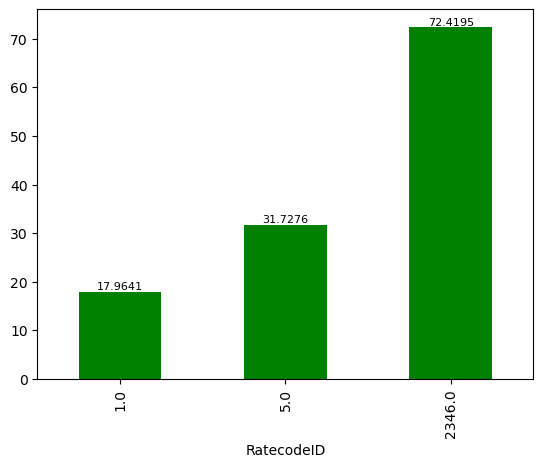

In [19]:
# Finding the average total_amount of ratecodeID
ax=greentaxidf.total_amount.groupby(greentaxidf.RatecodeID).mean().plot(kind="bar",color="green")
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

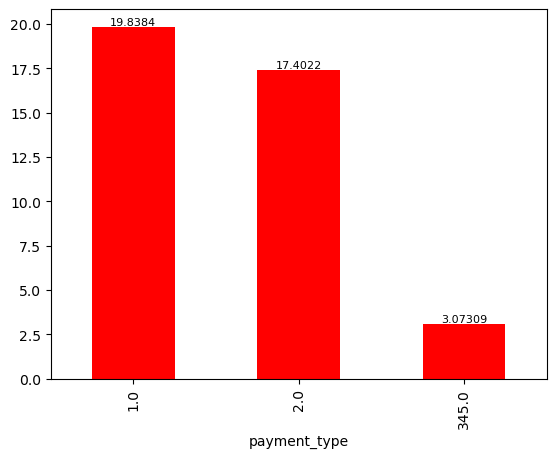

In [20]:
# Finding the average total-amount of payment_type
ax=greentaxidf.total_amount.groupby(greentaxidf.payment_type).mean().plot(kind="bar",color="red")
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

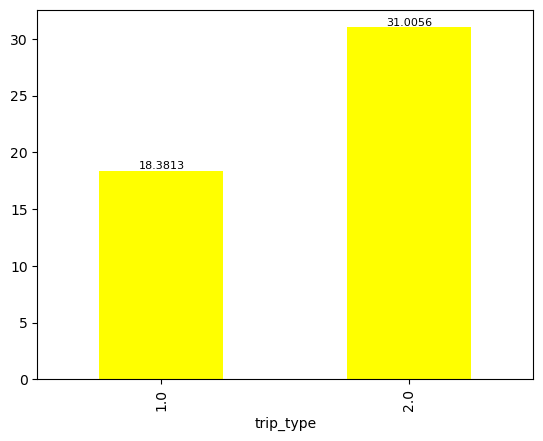

In [21]:
# Finding the average total-amount of trip_type
ax=greentaxidf.total_amount.groupby(greentaxidf.trip_type).mean().plot(kind="bar",color="yellow")
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

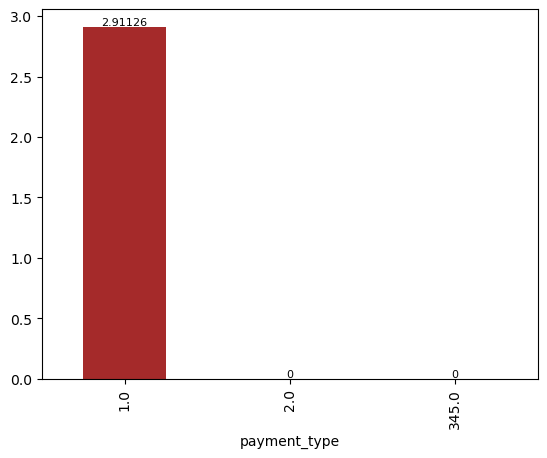

In [22]:
# Tips Analysis
# The average tip_amoount of payment_type
ax=greentaxidf.tip_amount.groupby(greentaxidf.payment_type).mean().plot(kind="bar",color="brown")
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

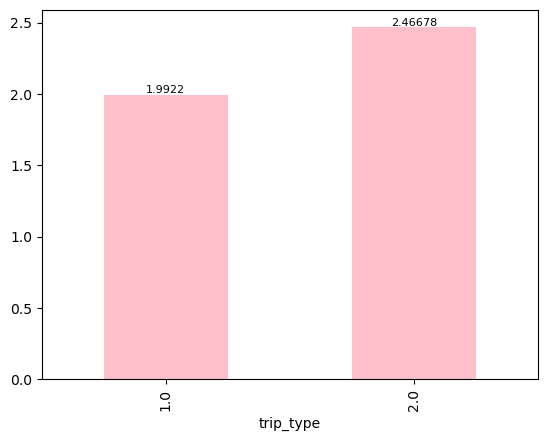

In [23]:
# The average tip_amount of trip_type
ax=greentaxidf.tip_amount.groupby(greentaxidf.trip_type).mean().plot(kind="bar",color="pink")
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

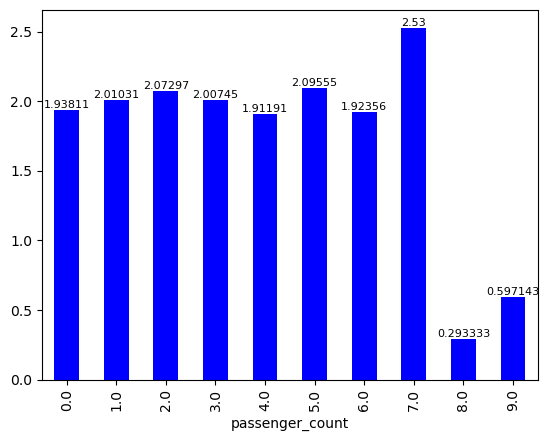

In [24]:
# The average trip_amount of passenger_counts
ax=greentaxidf.tip_amount.groupby(greentaxidf.passenger_count).mean().plot(kind="bar",color="blue")
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

In [25]:
# relationship b/w trip_amount and trip_distance
greentaxidf[["tip_amount","trip_distance"]].corr()

,tip_amount,trip_distance
tip_amount,1.000000,0.011214
trip_distance,0.011214,1.000000


<AxesSubplot:xlabel='tip_amount', ylabel='trip_distance'>

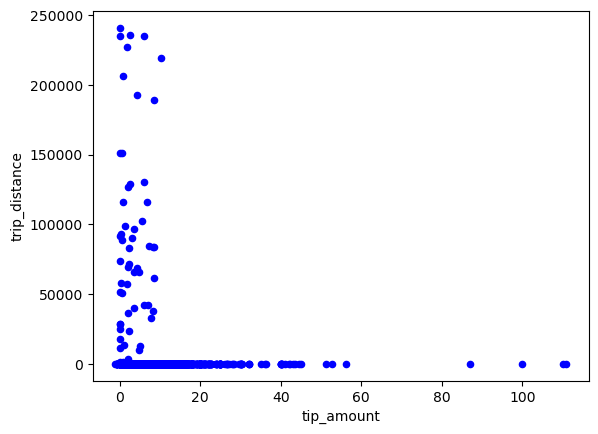

In [26]:
greentaxidf.plot(x="tip_amount",y="trip_distance",kind="scatter",color="blue")

In [27]:
# 5. Is there relationship b/w tip_amount and total_amount
greentaxidf[["tip_amount","total_amount"]].corr()

,tip_amount,total_amount
tip_amount,1.000000,0.375997
total_amount,0.375997,1.000000


<AxesSubplot:xlabel='tip_amount', ylabel='total_amount'>

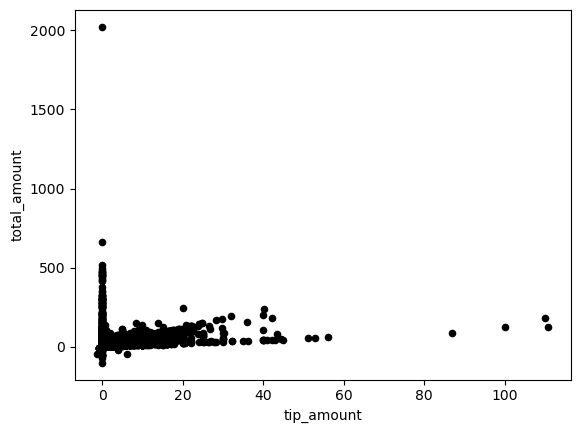

In [28]:
greentaxidf.plot(x="tip_amount",y="total_amount",kind="scatter",color="black")

## HYPOTHESIS TESTING

In [29]:
greentaxidf.total_amount.groupby(greentaxidf.trip_type).mean()

trip_type
1.0    18.381265
2.0    31.005553
Name: total_amount, dtype: float64

In [30]:
triptype1=greentaxidf[greentaxidf.trip_type==1]
triptype2=greentaxidf[greentaxidf.trip_type==2]

In [31]:
from scipy.stats import ttest_ind
# Hypothesi Testing using ttest due to categorical variable with 2 levels.

In [32]:
ttest_ind(triptype1.total_amount,triptype2.total_amount,equal_var=False)
# Since pvalue=2.9000305773811394e-88 is less than 0.05, Reject null hypothesis.

Ttest_indResult(statistic=-20.589897092606734, pvalue=2.9000305773811394e-88)

In [33]:
greentaxidf.tip_amount.groupby(greentaxidf.trip_type).mean()

trip_type
1.0    1.992197
2.0    2.466779
Name: tip_amount, dtype: float64

In [34]:
triptype1=greentaxidf[greentaxidf.trip_type==1]
triptype2=greentaxidf[greentaxidf.trip_type==2]

In [35]:
ttest_ind(triptype1.tip_amount,triptype2.tip_amount,equal_var=False)
# since pvalue=3.715666661105563e-09 less than 0.05, Reject null hypothesis 

Ttest_indResult(statistic=-5.913719401052093, pvalue=3.715666661105563e-09)

In [36]:
greentaxidf.total_amount.groupby(greentaxidf.payment_type).mean()

payment_type
1.0      19.838426
2.0      17.402194
345.0     3.073086
Name: total_amount, dtype: float64

In [37]:
paymenttype1=greentaxidf[greentaxidf.payment_type==1.0]
paymenttype2=greentaxidf[greentaxidf.payment_type==2.0]
paymenttype345=greentaxidf[greentaxidf.payment_type==345.0]

In [38]:
from scipy.stats import f_oneway
# Hypothesi Testing using f_oneway due to categorical variable with more than 2 levels.

In [39]:
f_oneway(paymenttype1.total_amount,paymenttype2.total_amount,paymenttype345.total_amount)
# since pvalue=4.358850591808613e-118 less than 0.05, Reject null Hypothesis

F_onewayResult(statistic=271.40820378356426, pvalue=4.358850591808613e-118)

In [40]:
greentaxidf.trip_distance.groupby(greentaxidf.payment_type).mean()

payment_type
1.0      119.056262
2.0        3.029354
345.0      0.778354
Name: trip_distance, dtype: float64

In [41]:
paymenttype1=greentaxidf[greentaxidf.payment_type==1.0]
paymenttype2=greentaxidf[greentaxidf.payment_type==2.0]
paymenttype345=greentaxidf[greentaxidf.payment_type==345.0]

In [42]:
f_oneway(paymenttype1.trip_distance,paymenttype2.trip_distance,paymenttype345.trip_distance)
# Since 0.00038613931224988884 less than 0.05, Reject null hypothesis

F_onewayResult(statistic=7.8603037386391525, pvalue=0.00038613931224988884)

In [43]:
pd.crosstab(greentaxidf.trip_type,greentaxidf.payment_type)

payment_type,1.0,2.0,345.0
trip_type,,,
1.0,41115,17816,445
2.0,2005,891,41


In [44]:
from scipy.stats import chi2_contingency
 # Hypothesi Testing using chisqare contingency due to categorical variable.

In [45]:
chi2_contingency(pd.crosstab(greentaxidf.trip_type,greentaxidf.payment_type))
# Since P-value=0.000433351106066754 less than 0.05, Reject null hypothesis

(15.48792458004721,
 0.000433351106066754,
 2,
 array([[4.10876241e+04, 1.78252826e+04, 4.63093351e+02],
        [2.03237591e+03, 8.81717443e+02, 2.29066487e+01]]))

In [46]:
pd.crosstab(greentaxidf.passenger_count,greentaxidf.payment_type)

payment_type,1.0,2.0,345.0
passenger_count,,,
0.0,189,99,8
1.0,37588,15715,397
2.0,3151,1780,62
3.0,484,281,4
4.0,167,89,1
5.0,901,363,6
6.0,633,372,8
7.0,1,1,0
8.0,4,2,0


In [47]:
chi2_contingency(pd.crosstab(greentaxidf.passenger_count,greentaxidf.payment_type))
# Since P-value=7.001525314283775e-28 less than 0.05, Reject null hypothesis

(175.63617422665558,
 7.001525314283775e-28,
 18,
 array([[2.04829169e+02, 8.88622278e+01, 2.30860334e+00],
        [3.71598864e+04, 1.61212893e+04, 4.18824322e+02],
        [3.45510824e+03, 1.49894967e+03, 3.89420827e+01],
        [5.32140645e+02, 2.30861666e+02, 5.99768909e+00],
        [1.77841542e+02, 7.71540289e+01, 2.00442925e+00],
        [8.78827853e+02, 3.81266991e+02, 9.90515623e+00],
        [7.00986311e+02, 3.04112962e+02, 7.90072698e+00],
        [1.38398087e+00, 6.00420458e-01, 1.55986712e-02],
        [4.15194261e+00, 1.80126137e+00, 4.67960137e-02],
        [4.84393305e+00, 2.10147160e+00, 5.45953493e-02]]))

In [48]:
objcols.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type'], dtype='object')

In [49]:
greentaxi.lpep_dropoff_datetime.head()
# We can exetract variables from datetime like year, month, quarter, weekday, hour

0   2022-11-01 00:31:56
1   2022-11-01 01:12:50
2   2022-11-01 00:55:38
3   2022-11-01 00:12:28
4   2022-11-01 00:22:03
Name: lpep_dropoff_datetime, dtype: datetime64[ns]

In [50]:
greentaxi.lpep_dropoff_datetime.tail()

62308   2022-11-30 23:53:00
62309   2022-12-01 00:01:00
62310   2022-11-30 23:46:00
62311   2022-11-30 23:30:00
62312   2022-11-30 23:23:00
Name: lpep_dropoff_datetime, dtype: datetime64[ns]

In [51]:
# Inbuilt library in pandas called datetime (dt)
objcols["weekday"]=greentaxi.lpep_dropoff_datetime.dt.weekday

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\2600347749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols["weekday"]=greentaxi.lpep_dropoff_datetime.dt.weekday


In [52]:
objcols.weekday.head()

0    1
1    1
2    1
3    1
4    1
Name: weekday, dtype: int64

In [53]:
objcols.weekday.value_counts()

# 0-mon, 1-tue, 2-wed, 3-thur, 4-fri, 5-sat, 6-sun

2    11529
1    11085
4     8652
3     8584
0     8440
5     7597
6     6426
Name: weekday, dtype: int64

In [54]:
objcols["hourofday"]=greentaxi.lpep_dropoff_datetime.dt.hour

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\989381064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols["hourofday"]=greentaxi.lpep_dropoff_datetime.dt.hour


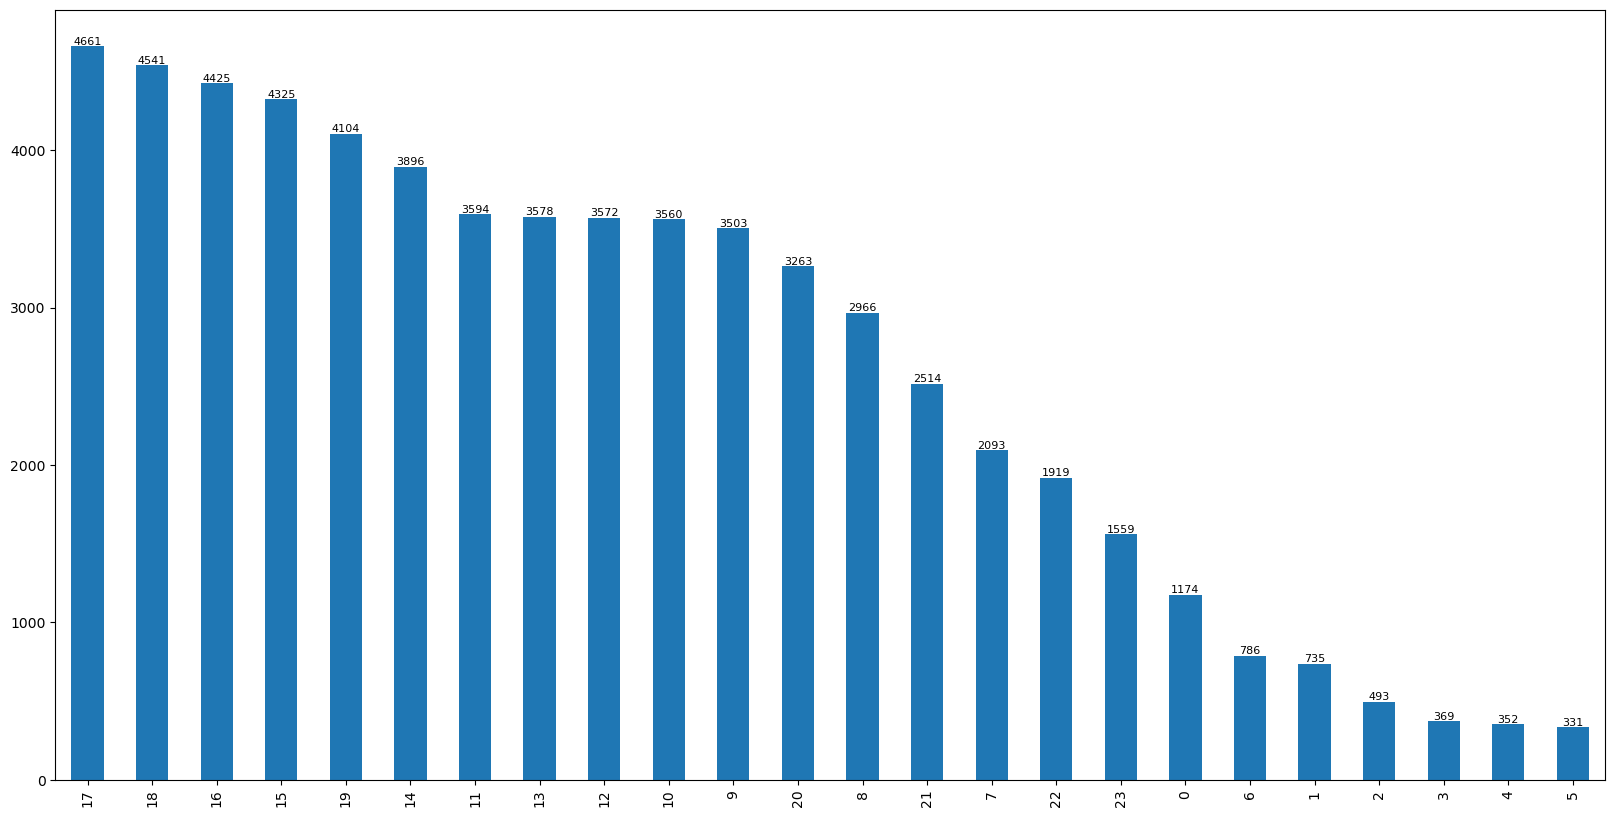

In [55]:
plt.figure(figsize=(20,10))
ax=objcols.hourofday.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i,fontsize=8)

In [56]:
greentaxidf.total_amount.groupby(objcols.hourofday).mean()

hourofday
0     19.647768
1     18.725401
2     21.090446
3     22.505095
4     25.151051
5     29.594864
6     19.361794
7     17.707066
8     18.048635
9     18.801113
10    18.487008
11    18.639068
12    19.576123
13    18.375660
14    18.587264
15    18.499385
16    19.076881
17    18.832821
18    19.051262
19    18.892125
20    19.242421
21    19.534893
22    18.937285
23    20.035266
Name: total_amount, dtype: float64

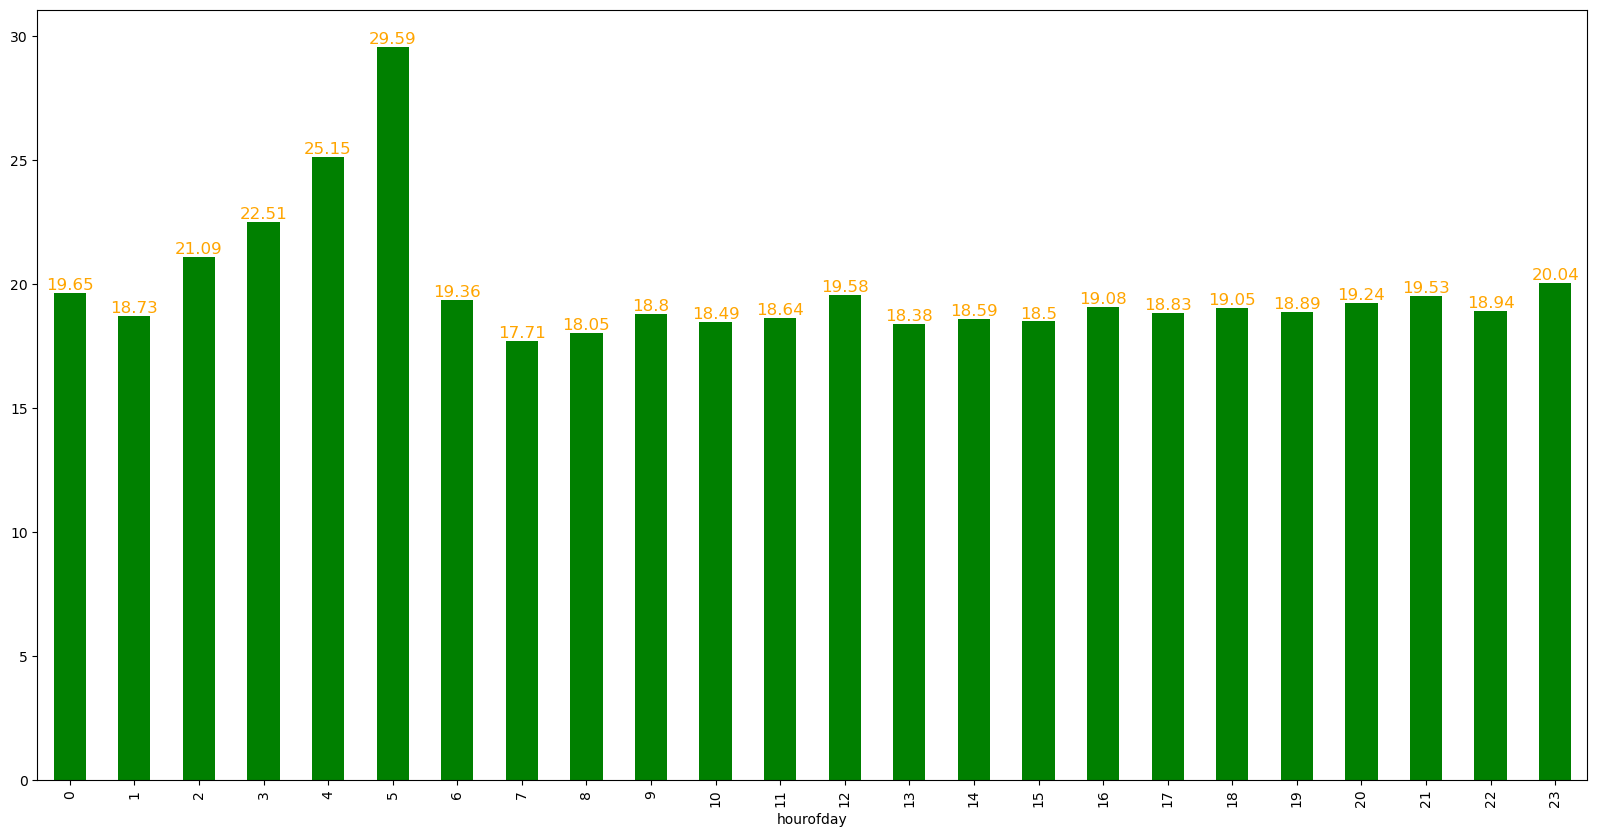

In [57]:
plt.figure(figsize=(20,10))
ax=np.round(greentaxidf.total_amount.groupby(objcols.hourofday).mean(),2).plot(kind="bar",color="green")
for i in ax.containers:
    ax.bar_label(i,fontsize=12,color="orange")

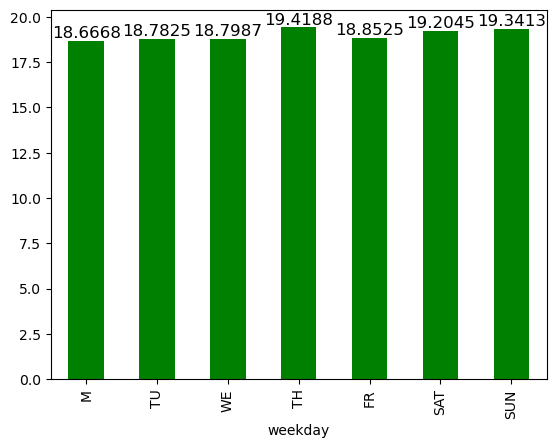

In [58]:
ax=greentaxidf.total_amount.groupby(objcols.weekday).mean().plot(kind="bar",color="green")

for i in ax.containers:
    ax.bar_label(i,fontsize=12)
    ax.set_xticklabels(["M","TU","WE","TH","FR","SAT","SUN"])

In [59]:
numcols["trip_duration"]=greentaxi.lpep_dropoff_datetime-greentaxi.lpep_pickup_datetime

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\702863654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols["trip_duration"]=greentaxi.lpep_dropoff_datetime-greentaxi.lpep_pickup_datetime


In [60]:
numcols.trip_duration=numcols.trip_duration.dt.seconds/60

C:\Users\SSD\AppData\Local\Temp\ipykernel_10428\437933021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols.trip_duration=numcols.trip_duration.dt.seconds/60


In [61]:
numcols.trip_duration.head()

0     3.316667
1    21.800000
2     3.800000
3     8.933333
4     4.283333
Name: trip_duration, dtype: float64

In [62]:
objcols.hourofday.groupby(numcols.trip_duration).value_counts()

trip_duration  hourofday
0.000000       15           14
               11           11
               14            8
               18            8
               12            7
                            ..
1438.433333    14            1
1438.783333    19            1
1439.116667    21            1
1439.266667    17            1
1439.816667    21            1
Name: hourofday, Length: 28926, dtype: int64

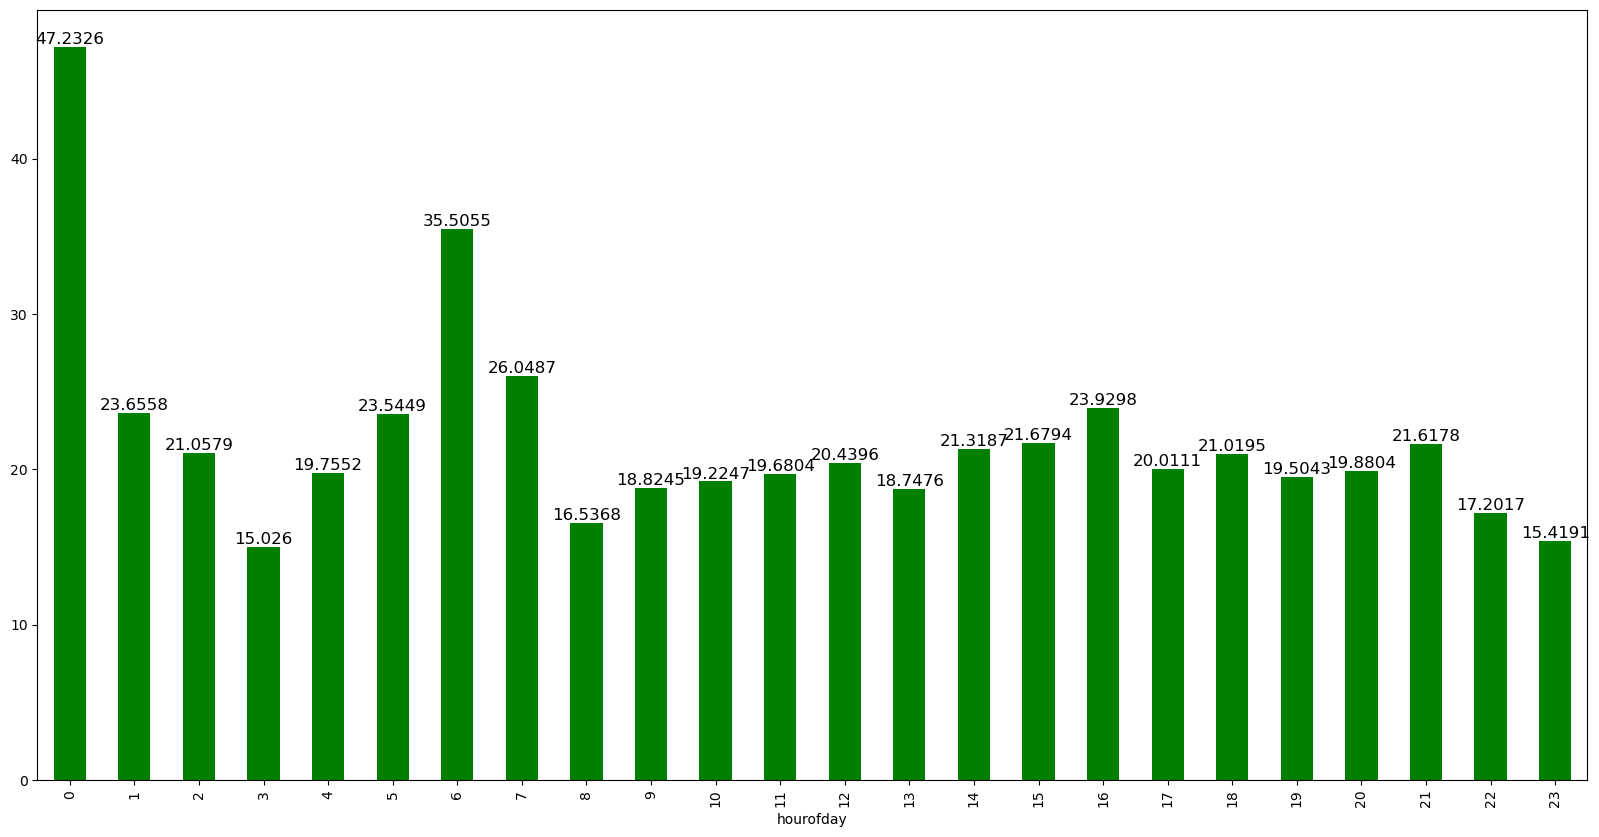

In [63]:
plt.figure(figsize=(20,10))
ax=numcols.trip_duration.groupby(objcols.hourofday).mean().plot(kind="bar",color="green")
for i in ax.containers:
    ax.bar_label(i,fontsize=12)

In [64]:
objcols.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type',
       'weekday', 'hourofday'],
      dtype='object')

In [65]:
# Dummy Encode  object colums compulsory else cannot build model 
# with object data
objcols_dummy=pd.get_dummies(objcols,columns=['store_and_fwd_flag',  
    'RatecodeID', 'payment_type', 'trip_type','weekday', 'hourofday'])

In [66]:
objcols_dummy.shape

(62313, 41)

# Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
stdscr=StandardScaler()

In [69]:
numcols_stdscr=stdscr.fit_transform(numcols)

In [70]:
numcols_stdscr=pd.DataFrame(numcols_stdscr,columns=numcols.columns)

In [71]:
numcols_stdscr.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,-0.302200,-0.024475,-0.579810,0.259212,0.419540,-0.204103,-0.169652,0.070511,-0.606280,-0.577862,-0.215749
1,0.788757,-0.022653,1.658538,-0.546429,-2.301968,2.745915,-0.169652,0.070511,2.000052,1.729974,0.009892
2,0.788757,-0.024514,-0.579810,0.259212,0.419540,-0.728309,-0.169652,0.070511,-0.681249,-0.577862,-0.209849
3,-0.302200,-0.023874,-0.248203,0.259212,0.419540,-0.728309,-0.169652,0.070511,-0.371033,-0.577862,-0.147182
4,-0.302200,-0.024416,-0.552176,0.259212,0.419540,-0.157105,-0.169652,0.070511,-0.573708,-0.577862,-0.203948


### Correlation of numeric categorical features

<AxesSubplot:>

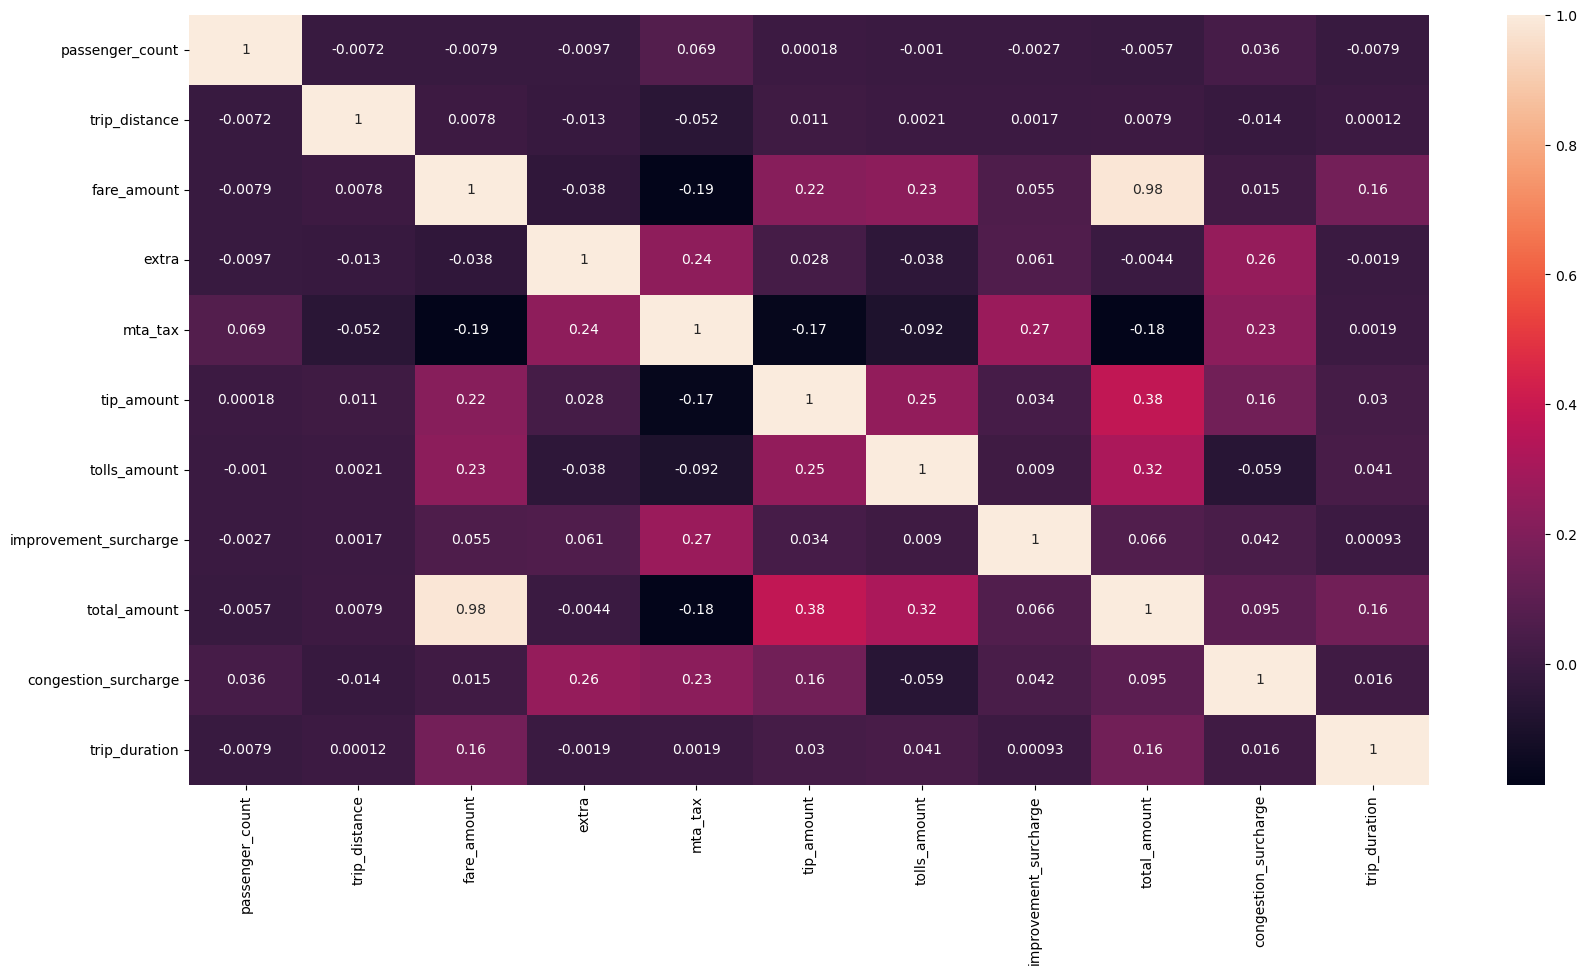

In [72]:
plt.figure(figsize=(20,10))
import seaborn as sns
sns.heatmap(numcols.corr(),annot=True)

In [73]:
# Due to multi-collinearity dropping fare_amount.
numcols=numcols.drop("fare_amount",axis=1)

In [74]:
combindf=pd.concat([objcols_dummy,numcols],axis=1)

## Spliting The Data in to Dependent(y) and Independent(X)  Variables


In [75]:
y=combindf.total_amount
X=combindf.drop('total_amount',axis=1)

<AxesSubplot:>

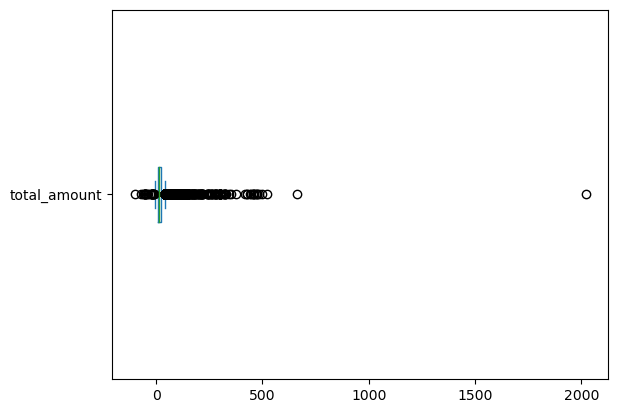

In [76]:
y.plot(kind="box",vert=False)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

##  Model Building

##  1) Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lireg=LinearRegression()

In [81]:
lireg_model=lireg.fit(X_train,y_train)

In [82]:
lireg_model.score(X_train,y_train)

0.2705820847602599

## 2) Decision TreeRegressor

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
dtr=DecisionTreeRegressor(max_depth=8)

In [85]:
dtr_model=dtr.fit(X_train,y_train)

In [86]:
dtr_model.score(X_train,y_train)

0.8582820530501439

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(dtr,X_train,y_train)

array([0.50315258, 0.27698597, 0.7259837 , 0.64239335, 0.62751585])

## 3) RandomForestRegressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
Rf=RandomForestRegressor(n_estimators=1000)

In [91]:
Rfmodel=Rf.fit(X_train,y_train)

In [92]:
Rfmodel.score(X_train,y_train)

0.9424392526319314